In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint


# create a "members" dataset
memberships = pd.read_csv('data\\memberships.csv', parse_dates=['joined','visited'])
members = memberships[['member_id', 'name', 'hometown', 'city','state', 'lat', 'lon']].groupby('member_id').first()

# read in group information and trim down to only groups with edges
groups = pd.read_csv('data\\groups.csv', index_col='group_id')
groups = groups.loc[memberships.group_id.unique()]

# Read in Event Data
rsvps = pd.read_csv('data/rsvps.csv')
events = pd.read_csv('data/events.csv')

In [2]:
# Set up PyNash DataFrames
pynash_info = groups.loc[groups.group_name == 'PyNash'].iloc[0]
pynash_events = events.loc[events.group_urlname == 'PyNash']

# All members 
pynash_member_ids = memberships.loc[memberships.group_id == 11625832].member_id
pynash_members = members.loc[pynash_member_ids]

# One event
lunch_rsvps = rsvps.loc[rsvps.event_id == 'cldxflywnbgb']

In [3]:
pynash_info

group_name            PyNash
num_members             1442
category_id               34
category_name           Tech
organizer_id     2.15202e+08
group_urlname         PyNash
Name: 11625832, dtype: object

In [4]:
pynash_members[['name', 'hometown', 'city', 'state']].head(10)

,name,hometown,city,state
member_id,,,,
6144606,Aaric Pittman,Smyrna,Smyrna,TN
65072762,Aaron,Saratoga,Brentwood,TN
225546676,Aaron Barfoot,NaN,Nashville,TN
41795222,Aaron Carlton,NaN,Murfreesboro,TN
190499461,Aaron Hall,NaN,Nolensville,TN
205279429,Aaron K,NaN,Nashville,TN
66862502,Aaron Price,NaN,Nashville,TN
7768516,Aaron Webb,"Urbandale, IA",Springfield,TN
5739275,Aaron West,"Clarksville, TN",Mount Juliet,TN


In [5]:
pynash_events[['name', 'time', 'yes_rsvp_count']].head()

,name,time,yes_rsvp_count
13554,"An October Two-fer: Refactoring, Extra Code In...",2017-10-26 23:00:00,40
13555,PyNash Lunch!,2017-10-04 16:00:00,19
13556,Creating Better Beer Through Data Science,2017-09-28 23:00:00,69
13557,PyNash Lunch!,2017-09-06 16:00:00,15
13558,You and I and the PyNash API,2017-08-24 23:00:00,59


In [6]:
lunch_rsvps.set_index('member_id').join(members)[['name', 'city']].head()

,name,city
member_id,,
237869773,Alaric Reinhard,Nashville
53439252,Avi,Hendersonville
127214502,Bryan P Marlowe,Smyrna
156626172,Dan Burger,Nashville
234179814,Didi Hill,Nashville


In [7]:
lunch_rsvps[['event_id', 'member_id']].head()

,event_id,member_id
74389,cldxflywnbgb,237869773
74390,cldxflywnbgb,53439252
74391,cldxflywnbgb,127214502
74392,cldxflywnbgb,156626172
74393,cldxflywnbgb,234179814


### Create the Lunch Graph

In [8]:
# Create an (undirected) Graph instance.
g = nx.Graph()

# Add nodes - a few members and the event itself.
g.add_node(237869773)
g.add_node(53439252)
g.add_node(127214502)
g.add_node('cldxflywnbgb')

# Add edges between members and the event.
g.add_edge(127214502, 'cldxflywnbgb')
g.add_edge(53439252, 'cldxflywnbgb')

In [9]:
g

In [11]:
g.nodes()

NodeView((237869773, 53439252, 127214502, 'cldxflywnbgb'))

In [42]:
dict(g.nodes())

{237869773: {},
 'cldxflywnbgb': {},
 53439252: {},
 127214502: {},
 156626172: {},
 234179814: {},
 43237102: {},
 30123762: {},
 111917572: {},
 191186119: {},
 236998384: {},
 237645407: {},
 184389351: {},
 183564319: {},
 204129504: {},
 182591120: {},
 232676485: {},
 2896514: {},
 230753190: {},
 2069: {}}

In [20]:
# Add attributes to the nodes using a dictionary.
type_dict = {237869773: 'person', 
             53439252: 'person',
             127214502: 'person',
             'cldxflywnbgb': 'event'}
nx.set_node_attributes(g, type_dict, 'type')
nx.set_edge_attributes(g, {(53439252, 'cldxflywnbgb'): 'first_event'}, 'special')

dict(g.nodes(data=True))

{237869773: {'type': 'person'},
 53439252: {'type': 'person'},
 127214502: {'type': 'person'},
 'cldxflywnbgb': {'type': 'event'}}

In [28]:
dict(g[53439252])

{'cldxflywnbgb': {'special': 'first_event'}}

In [29]:
dict(g[53439252]['cldxflywnbgb'])

{'special': 'first_event'}

In [30]:
del g

# Create graph using a list of edges.
edge_list = [(s.member_id, s.event_id) 
                 for ind, s in lunch_rsvps.iterrows()]
g = nx.from_edgelist(edge_list)

In [41]:
dict(g.edges())

{(237869773, 'cldxflywnbgb'): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 53439252): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 127214502): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 156626172): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 234179814): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 43237102): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 30123762): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 111917572): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 191186119): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 236998384): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 237645407): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 184389351): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 183564319): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 204129504): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 182591120): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 232676485): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 2896514): {'group_urlname': 'PyNash'},
 (

In [43]:
# Create graph from Pandas Dataframe
g = nx.from_pandas_dataframe(lunch_rsvps, 
                             source = 'member_id', 
                             target='event_id',
                             edge_attr=['group_urlname'])

dict(g.edges)

{(237869773, 'cldxflywnbgb'): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 53439252): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 127214502): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 156626172): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 234179814): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 43237102): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 30123762): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 111917572): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 191186119): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 236998384): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 237645407): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 184389351): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 183564319): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 204129504): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 182591120): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 232676485): {'group_urlname': 'PyNash'},
 ('cldxflywnbgb', 2896514): {'group_urlname': 'PyNash'},
 (

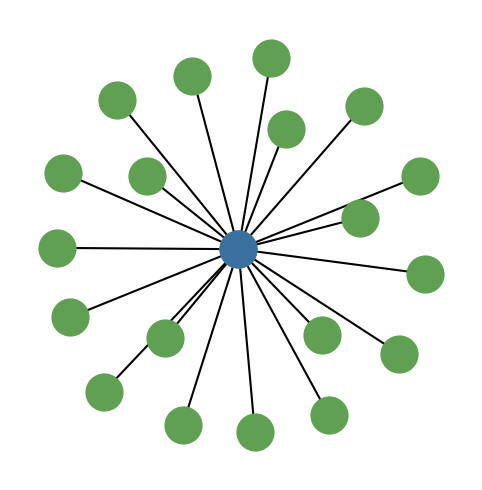

In [51]:
# Plot the lunch graph

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,dpi=150)

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, 
                 node_color='xkcd:muted green')
nx.draw_networkx_nodes(g, pos, nodelist=['cldxflywnbgb'], 
                       node_color='xkcd:muted blue')

# Other graph settings
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.set_aspect(1)
ax.set_frame_on(False)

plt.show()

### Analyzing all PyNash Events

In [95]:
list_of_pynash_events = events.loc[events.group_urlname == 'PyNash', 'event_id'].tolist()
pynash_rsvps = rsvps.loc[rsvps.event_id.isin(list_of_pynash_events)]

# Add metadata
# pynash_rsvps = pd.merge(pynash_rsvps, members[['name', 'city']], left_on='member_id', right_index=True)
# pynash_rsvps = pd.merge(pynash_rsvps, events[['event_id', 'name', 'time']], 
#                        left_on='event_id', right_on='event_id', suffixes=('_member', '_event'))

In [98]:
# Build DataFrame from pynash_rsvps

g = nx.from_pandas_dataframe(pynash_rsvps, source='member_id', target='event_id')

In [101]:
nx.is_bipartite(g)

True

In [111]:
member_nodes, event_nodes = nx.bipartite.sets(g)
print('There are {} members and {} events.'.format(len(member_nodes), len(event_nodes)))

There are 526 members and 46 events.


In [114]:
gm = nx.bipartite.weighted_projected_graph(g, member_nodes, ratio=False)
ge = nx.bipartite.weighted_projected_graph(g, event_nodes, ratio=False)

In [116]:
print('There are {} members and {} events.'.format(len(gm.nodes), len(ge.nodes)))

There are 526 members and 46 events.


In [124]:
dict(gm.degree)

{2069: 52,
 42506: 160,
 1939496: 121,
 2896514: 331,
 3246917: 92,
 3438546: 251,
 3661197: 125,
 4169858: 15,
 4393825: 316,
 4413235: 55,
 5351550: 38,
 5739749: 48,
 5783863: 75,
 7217653: 60,
 7222138: 119,
 7333165: 230,
 7606093: 8,
 7658930: 92,
 7670958: 55,
 7712083: 14,
 7752299: 96,
 7813939: 14,
 7981818: 312,
 8228323: 70,
 8688363: 101,
 8731661: 232,
 9005384: 46,
 9363105: 60,
 9852711: 319,
 9917104: 24,
 9946829: 105,
 10085652: 75,
 10223251: 58,
 10309794: 14,
 10853675: 51,
 11028407: 60,
 11288886: 38,
 11804293: 132,
 11832553: 134,
 11872972: 60,
 12074359: 84,
 12140530: 378,
 12248783: 67,
 12541555: 99,
 12579661: 164,
 12625982: 76,
 12853877: 268,
 13141514: 121,
 13214587: 80,
 13606604: 343,
 13812470: 296,
 14020645: 38,
 14219098: 4,
 14403986: 119,
 14466241: 11,
 14568344: 75,
 14589429: 42,
 14593999: 43,
 15360711: 24,
 15529121: 57,
 19147021: 166,
 20105041: 126,
 21990171: 22,
 23229581: 58,
 23897412: 133,
 25228452: 51,
 25691792: 16,
 2657670

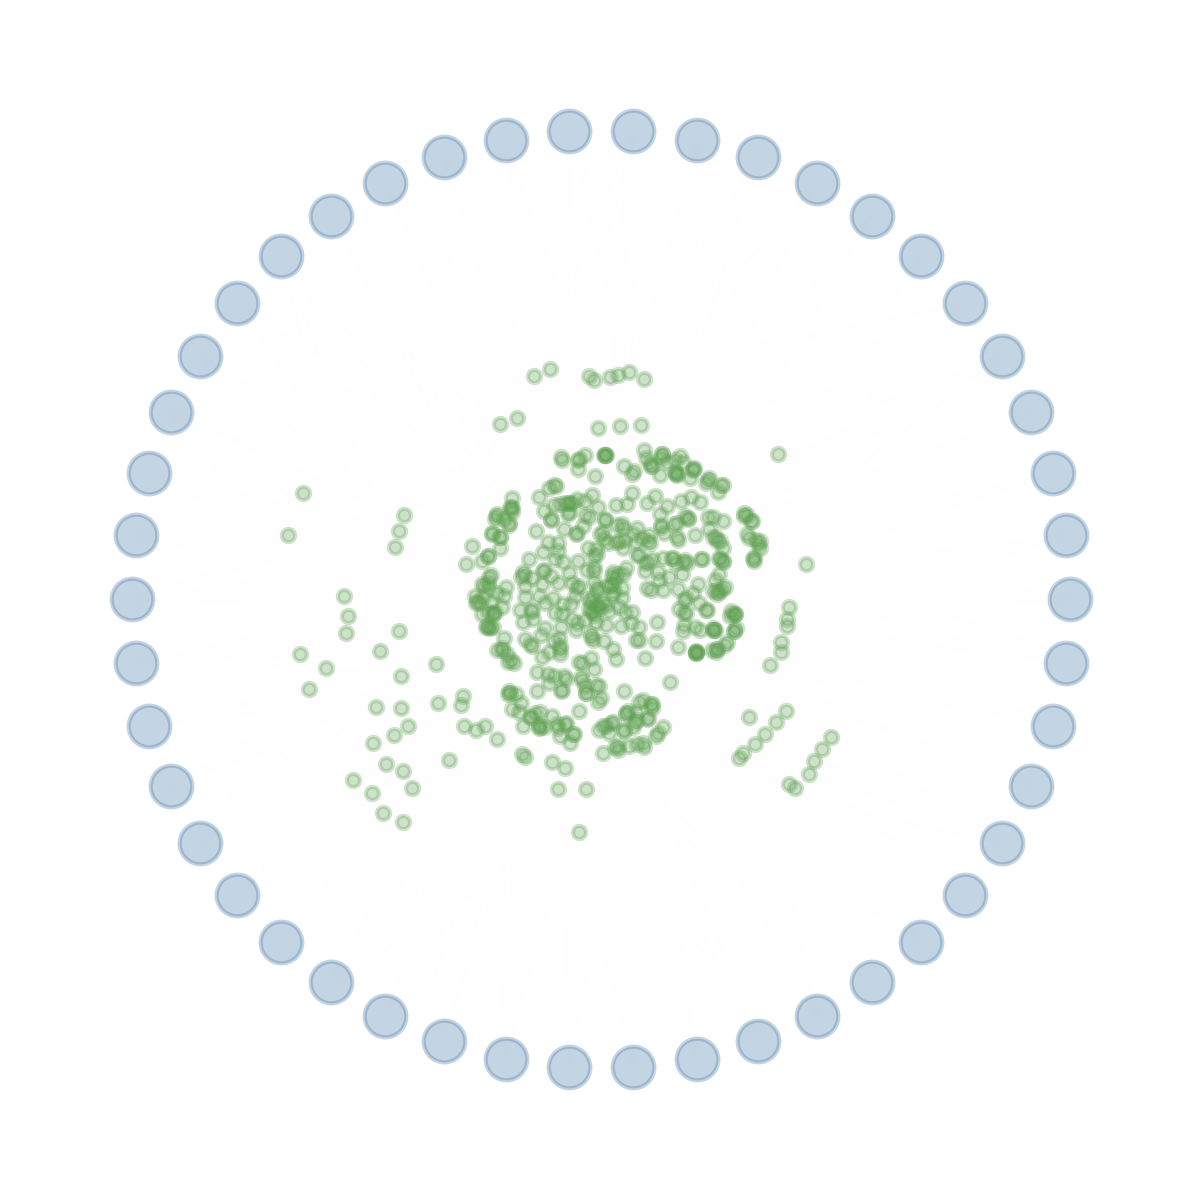

In [188]:
from utils import setup_graph_plot

fig, ax = setup_graph_plot(figsize=(5,5), dpi=300)

# Set up jittered plot
random_base = np.random.rand(len(gm), 2)
#member_pos = {x: (0.2 * random_base[ii,0], 1.5 * random_base[ii,1]) for ii, x in enumerate(gm.nodes)}
event_pos = {x: (0.1 * random_base[ii,0] + 0.3, random_base[ii,1]) for ii, x in enumerate(ge.nodes)}
member_pos = nx.spring_layout(gm)
event_pos = nx.circular_layout(ge)
event_pos = {k: 1.5*v for k,v in event_pos.items()}

nx.draw_networkx_nodes(gm, member_pos, alpha=0.3, node_size=10, node_color='xkcd:muted green')
nx.draw_networkx_nodes(ge, event_pos, alpha=0.3, node_size=100, node_color='xkcd:muted blue')
nx.draw_networkx_edges(g, pos={**member_pos, **event_pos}, alpha=0.005)

plt.show()

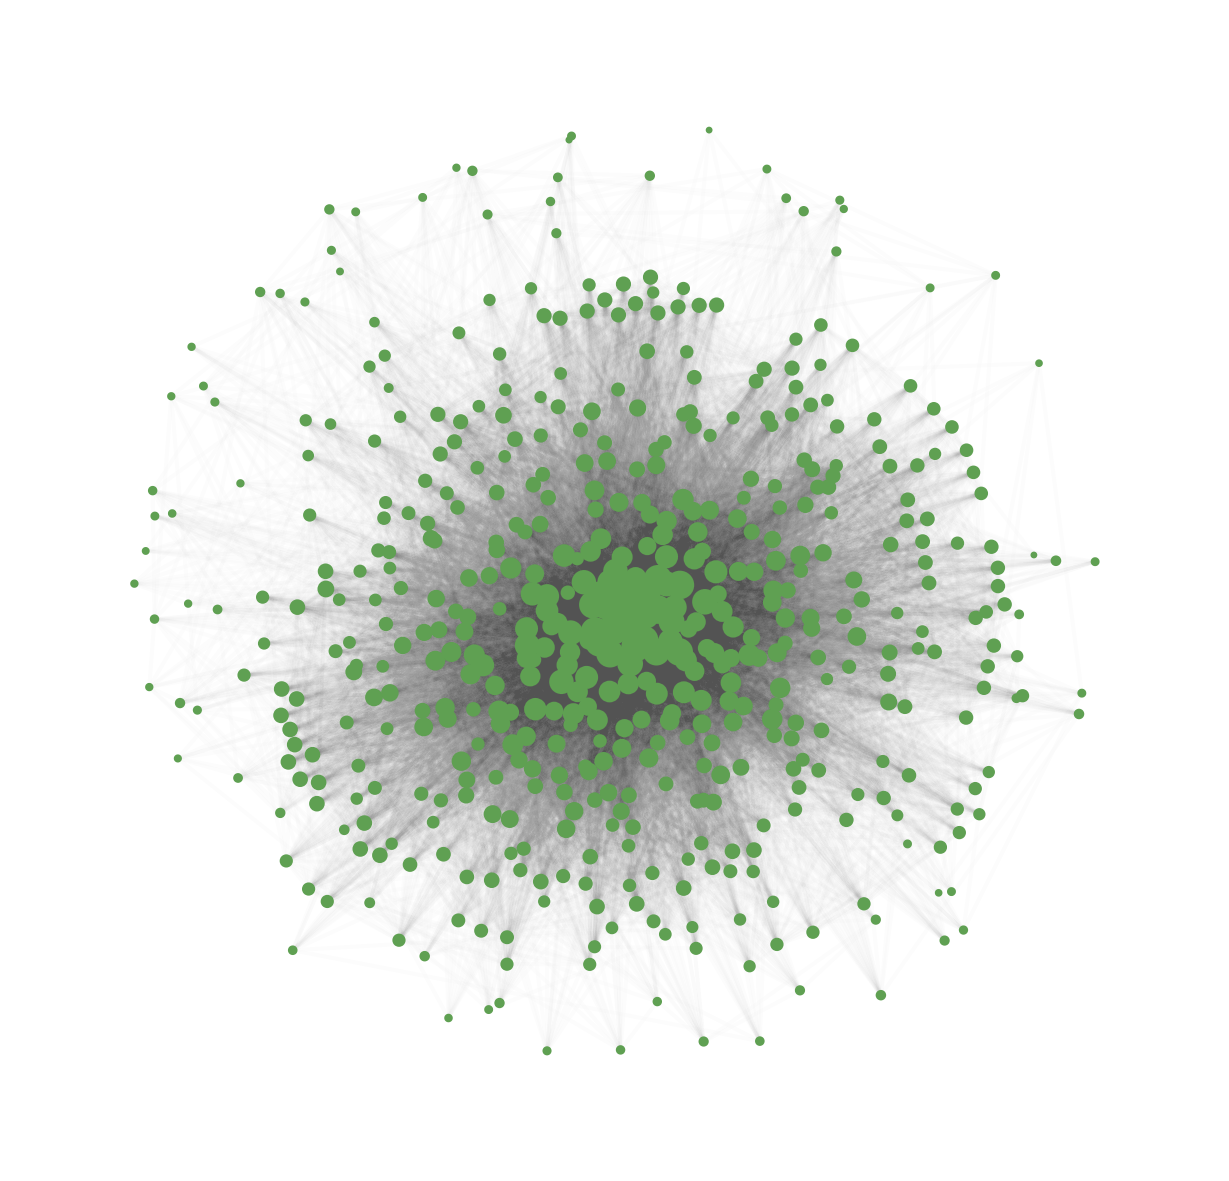

In [199]:
from utils import setup_graph_plot

fig, ax = setup_graph_plot(figsize=(5,5), dpi=300)

# member_pos = nx.spring_layout(gm, k=1)

nx.draw_networkx_nodes(gm, member_pos, alpha=1, node_size=[0.1* gm.degree[x] for x in gm.nodes], node_color='xkcd:muted green')
nx.draw_networkx_edges(gm, member_pos, alpha=0.01)

plt.show()

In [201]:
df_members = pd.DataFrame(index=[n for n in gm.nodes])
df_members['num_events'] = pd.Series(dict(nx.degree(g, member_nodes)))
df_members['degree'] = pd.Series(dict(nx.degree(gm)))
df_members['clustering_coefficient'] = pd.Series(nx.clustering(gm))
df_members['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(gm))

[0.04,
 0.2,
 0.01,
 0.08,
 0.03,
 0.02,
 0.01,
 0.02,
 0.08,
 0.04,
 0.05,
 0.06,
 0.01,
 0.01,
 0.02,
 0.01,
 0.09,
 0.06,
 0.06,
 0.05,
 0.14,
 0.01,
 0.04,
 0.05,
 0.09,
 0.01,
 0.17,
 0.01,
 0.05,
 0.03,
 0.02,
 0.06,
 0.01,
 0.04,
 0.13,
 0.11,
 0.01,
 0.06,
 0.14,
 0.01,
 0.08,
 0.01,
 0.01,
 0.04,
 0.03,
 0.07,
 0.04,
 0.1,
 0.07,
 0.05,
 0.08,
 0.02,
 0.15,
 0.06,
 0.04,
 0.17,
 0.03,
 0.05,
 0.13,
 0.04,
 0.11,
 0.2,
 0.12,
 0.07,
 0.09,
 0.03,
 0.17,
 0.03,
 0.12,
 0.05,
 0.1,
 0.05,
 0.03,
 0.05,
 0.11,
 0.11,
 0.03,
 0.01,
 0.1,
 0.08,
 0.04,
 0.03,
 0.06,
 0.02,
 0.12,
 0.05,
 0.03,
 0.1,
 0.03,
 0.02,
 0.04,
 0.02,
 0.04,
 0.03,
 0.02,
 0.03,
 0.02,
 0.02,
 0.01,
 0.05,
 0.02,
 0.03,
 0.05,
 0.01,
 0.03,
 0.01,
 0.01,
 0.01,
 0.03,
 0.01,
 0.02,
 0.03,
 0.01,
 0.03,
 0.04,
 0.02,
 0.03,
 0.01,
 0.02,
 0.02,
 0.01,
 0.03,
 0.02,
 0.02,
 0.02,
 0.04,
 0.02,
 0.04,
 0.03,
 0.01,
 0.16,
 0.02,
 0.11,
 0.05,
 0.05,
 0.03,
 0.01,
 0.06,
 0.06,
 0.08,
 0.13,
 0.01,
 0.01,
 0.05

In [252]:
nx.draw_networkx_edges?

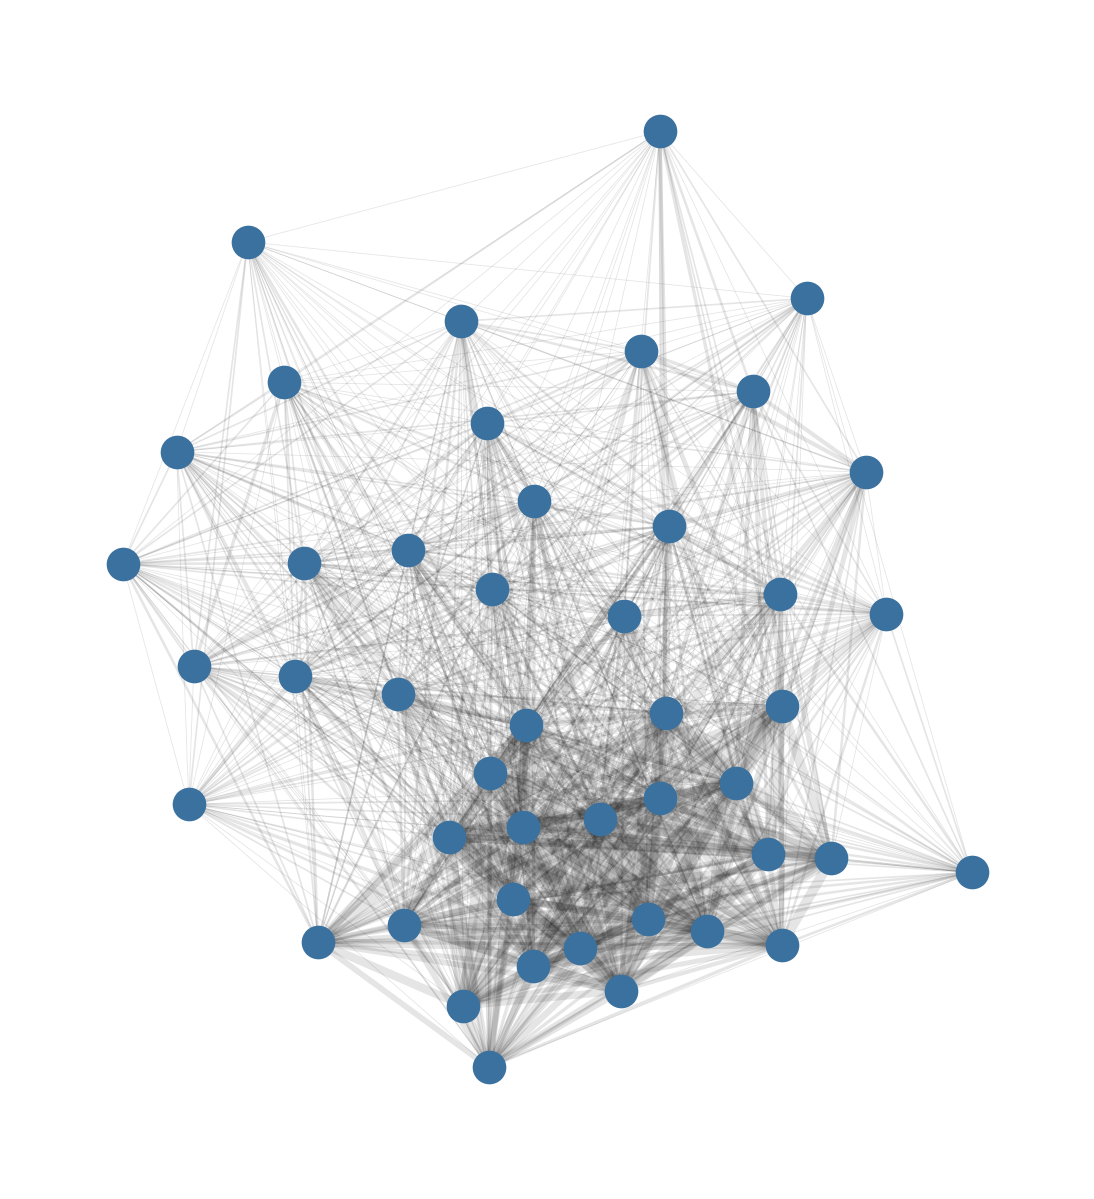

In [283]:
fig, ax = setup_graph_plot(figsize=(5,5), dpi=300)

pos = nx.spring_layout(ge)
edges_to_draw = [(u,v)  for u, v in ge.edges if ge[u][v]['weight'] > 10]
shared_attendees = [ge[u][v]['weight'] for u, v in ge.edges]

nx.draw_networkx_nodes(ge, pos, node_size=50, node_color='xkcd:muted blue', with_labels=False)
nx.draw_networkx_edges(ge, pos, alpha=0.1, width=[x*0.2 for x in shared_attendees])

plt.show()

In [285]:
df_members.join(members.name).sort_values(by='betweenness_centrality', ascending=False)

AttributeError: 'set' object has no attribute 'name'

In [286]:
df_members.sort_values(by='degree', ascending=False)

,num_events,degree,clustering_coefficient,betweenness_centrality
57907252,25,459,0.203471,0.053080
121334792,27,403,0.224732,0.055124
202882025,16,396,0.246465,0.027081
12140530,16,378,0.249323,0.028138
126309962,15,348,0.269618,0.020821
184547023,19,347,0.264380,0.031768
55029192,13,347,0.282254,0.017495
13606604,15,343,0.263362,0.021315
205937561,12,341,0.290081,0.016537
2896514,15,331,0.245372,0.037175


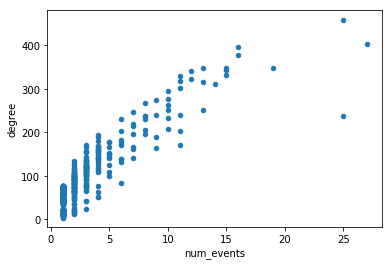

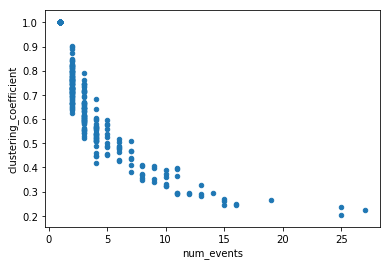

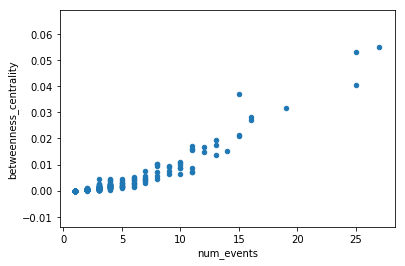

In [197]:
df_members.plot.scatter('num_events', 'degree')
df_members.plot.scatter('num_events', 'clustering_coefficient')#betweenness_centrality')
df_members.plot.scatter('num_events', 'betweenness_centrality')
plt.show()

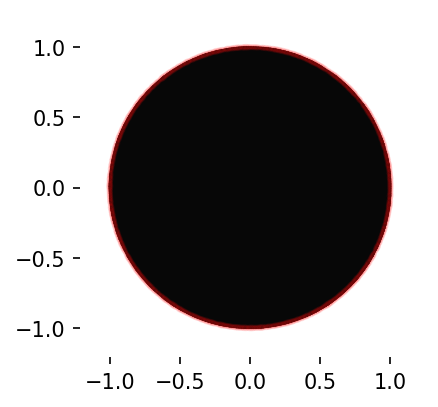

In [219]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=150)

node_sizes = [np.log(mg.degree[n]) for n in mg.nodes()]

pos = nx.circular_layout(mg)
nx.draw_networkx(mg, pos, with_labels=False, 
                 node_size=node_sizes, edge_alpha=0.001, 
                 alpha=0.1, ax=ax)

ax.set_aspect(1)
ax.set_frame_on(False)
plt.show()



In [303]:
sorted_indices = [i[0] for i in sorted(enumerate(adjmat.sum(axis=1)), key=lambda x:x[1])]

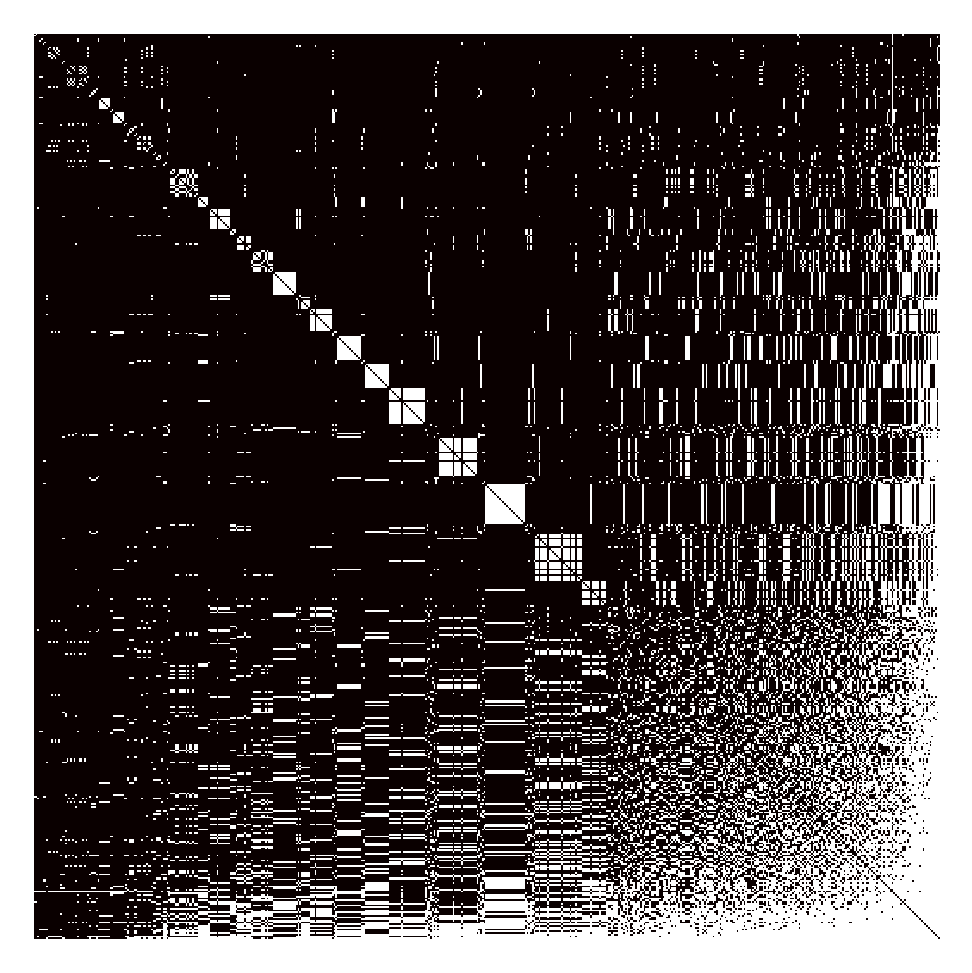

In [306]:
fig, ax = setup_graph_plot(dpi=300)

adjmat = nx.to_numpy_array(gm) > 0

ax.imshow(adjmat[sorted_indices,:][:, sorted_indices], cmap='hot')


plt.show()


In [226]:
members.loc[189887587]

name          Stephen
hometown          NaN
city        Nashville
state              TN
lat             36.15
lon            -86.86
Name: 189887587, dtype: object

In [227]:
df_members.loc[189887587]

num_events                  3.000000
degree                    143.000000
clustering_coefficient      0.577662
betweenness_centrality      0.001396
Name: 189887587, dtype: float64

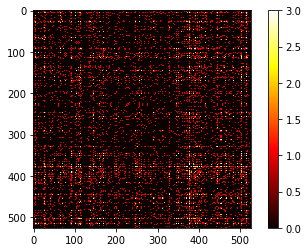

In [119]:
plt.imshow(, cmap='hot', vmax=3)
plt.colorbar()
plt.show()

In [238]:
from networkx.algorithms import community

comp = community.girvan_newman(mg)

In [240]:
tuple(sorted(c) for c in next(comp))

([2069,
  42506,
  1939496,
  2896514,
  3246917,
  3438546,
  3661197,
  4169858,
  4393825,
  4413235,
  5351550,
  5739749,
  5783863,
  7217653,
  7222138,
  7333165,
  7606093,
  7658930,
  7670958,
  7712083,
  7752299,
  7813939,
  7981818,
  8228323,
  8688363,
  8731661,
  9005384,
  9363105,
  9852711,
  9917104,
  9946829,
  10085652,
  10223251,
  10309794,
  10853675,
  11028407,
  11288886,
  11804293,
  11832553,
  11872972,
  12074359,
  12140530,
  12248783,
  12541555,
  12579661,
  12625982,
  12853877,
  13141514,
  13214587,
  13606604,
  13812470,
  14020645,
  14219098,
  14403986,
  14466241,
  14568344,
  14589429,
  14593999,
  15360711,
  15529121,
  19147021,
  20105041,
  21990171,
  23229581,
  23897412,
  25228452,
  25691792,
  26576702,
  27531452,
  30123762,
  30145882,
  32007512,
  32214442,
  33016112,
  33828812,
  34208282,
  34817302,
  35949012,
  35949052,
  36925522,
  38584482,
  38665162,
  38852502,
  39926142,
  40152352,
  43237102,
  44